In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
# -------------------------
# 1. LOAD & CLEAN DATA
# -------------------------

In [5]:
df = pd.read_csv('Walmart.csv')
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [6]:
df.tail()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667
6434,45,26-10-2012,760281.43,0,58.85,3.882,192.308899,8.667


In [7]:
# Get the shape of the DataFrame
df.shape

(6435, 8)

In [8]:
# check column names
df.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')

In [9]:
# inspect data types
df.dtypes

Store             int64
Date             object
Weekly_Sales    float64
Holiday_Flag      int64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
dtype: object

In [10]:
# Get information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [11]:
# Summary statistics
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [12]:
# Check for missing values
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [13]:
# Calculate percentage of missing values
df.isnull().mean() * 100

Store           0.0
Date            0.0
Weekly_Sales    0.0
Holiday_Flag    0.0
Temperature     0.0
Fuel_Price      0.0
CPI             0.0
Unemployment    0.0
dtype: float64

In [14]:
# Check for duplicate rows
df.duplicated().sum()

np.int64(0)

In [15]:
df.nunique()

Store             45
Date             143
Weekly_Sales    6435
Holiday_Flag       2
Temperature     3528
Fuel_Price       892
CPI             2145
Unemployment     349
dtype: int64

In [16]:
df.select_dtypes(include=['object']).head()

,Date
0,05-02-2010
1,12-02-2010
2,19-02-2010
3,26-02-2010
4,05-03-2010


In [17]:
df.select_dtypes(include=['object']).nunique()

Date    143
dtype: int64

In [18]:
df["Date"] = pd.to_datetime(df["Date"], format="%d-%m-%Y")

In [19]:
df['Date'].dtype

dtype('<M8[ns]')

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


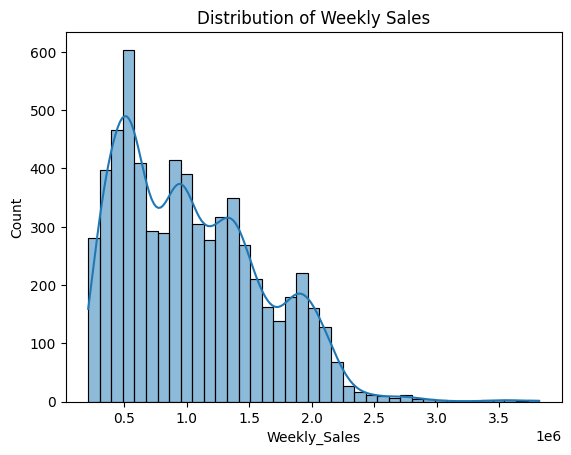

In [21]:
# Distribution of Weekly Sales
sns.histplot(df['Weekly_Sales'], kde=True)
plt.title('Distribution of Weekly Sales')
plt.show()

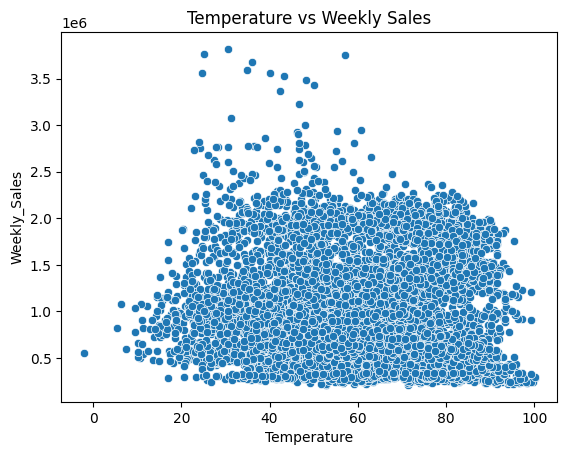

In [22]:
# Temperature vs Sales
sns.scatterplot(data = df, x='Temperature', y='Weekly_Sales')
plt.title('Temperature vs Weekly Sales')
plt.show()

In [23]:
df['Date'].nunique()


143

In [24]:
df = df.sort_values("Date")

In [25]:
unique_dates = df['Date'].drop_duplicates().reset_index(drop=True)
unique_dates = unique_dates.to_frame()
unique_dates['Time_Index'] = range(1, len(unique_dates)+1)
df = df.merge(unique_dates, on='Date', how='left')
df.head()


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Time_Index
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,1
1,10,2010-02-05,2193048.75,0,54.34,2.962,126.442065,9.765,1
2,37,2010-02-05,536006.73,0,45.97,2.572,209.852966,8.554,1
3,17,2010-02-05,789036.02,0,23.11,2.666,126.442065,6.548,1
4,30,2010-02-05,465108.52,0,39.05,2.572,210.752605,8.324,1


In [26]:
df_weekly = df[['Date', 'Weekly_Sales', 'Time_Index']].copy()
df_weekly.head()

,Date,Weekly_Sales,Time_Index
0,2010-02-05,1643690.90,1
1,2010-02-05,2193048.75,1
2,2010-02-05,536006.73,1
3,2010-02-05,789036.02,1
4,2010-02-05,465108.52,1


In [27]:
df_weekly_agg = df.groupby('Date')['Weekly_Sales'].mean().reset_index()
df_weekly_agg['Time_Index'] = range(1, len(df_weekly_agg) + 1)
df_weekly_agg.head()

,Date,Weekly_Sales,Time_Index
0,2010-02-05,1.105572e+06,1
1,2010-02-12,1.074148e+06,2
2,2010-02-19,1.072822e+06,3
3,2010-02-26,9.770794e+05,4
4,2010-03-05,1.041588e+06,5


In [28]:
df_weekly = df[['Date', 'Weekly_Sales', 'Time_Index']]


In [29]:
df_weekly_agg


,Date,Weekly_Sales,Time_Index
0,2010-02-05,1.105572e+06,1
1,2010-02-12,1.074148e+06,2
2,2010-02-19,1.072822e+06,3
3,2010-02-26,9.770794e+05,4
4,2010-03-05,1.041588e+06,5
...,...,...,...
138,2012-09-28,9.718867e+05,139
139,2012-10-05,1.057036e+06,140
140,2012-10-12,1.025078e+06,141
141,2012-10-19,1.002720e+06,142


In [30]:
df_weekly

,Date,Weekly_Sales,Time_Index
0,2010-02-05,1643690.90,1
1,2010-02-05,2193048.75,1
2,2010-02-05,536006.73,1
3,2010-02-05,789036.02,1
4,2010-02-05,465108.52,1
...,...,...,...
6430,2012-10-26,688940.94,143
6431,2012-10-26,319550.77,143
6432,2012-10-26,921264.52,143
6433,2012-10-26,1127516.25,143


In [31]:
# Calculate a 4-week moving average of weekly sales.
df_weekly_agg['Smoothed_4'] = df_weekly_agg['Weekly_Sales'].rolling(4).mean()



In [32]:
df_weekly_agg.head(10)

,Date,Weekly_Sales,Time_Index,Smoothed_4
0,2010-02-05,1.105572e+06,1,NaN
1,2010-02-12,1.074148e+06,2,NaN
2,2010-02-19,1.072822e+06,3,NaN
3,2010-02-26,9.770794e+05,4,1.057405e+06
4,2010-03-05,1.041588e+06,5,1.041410e+06
5,2010-03-12,1.020564e+06,6,1.028014e+06
6,2010-03-19,9.997550e+05,7,1.009747e+06
7,2010-03-26,9.807547e+05,8,1.010666e+06
8,2010-04-02,1.120530e+06,9,1.030401e+06
9,2010-04-09,1.052562e+06,10,1.038400e+06


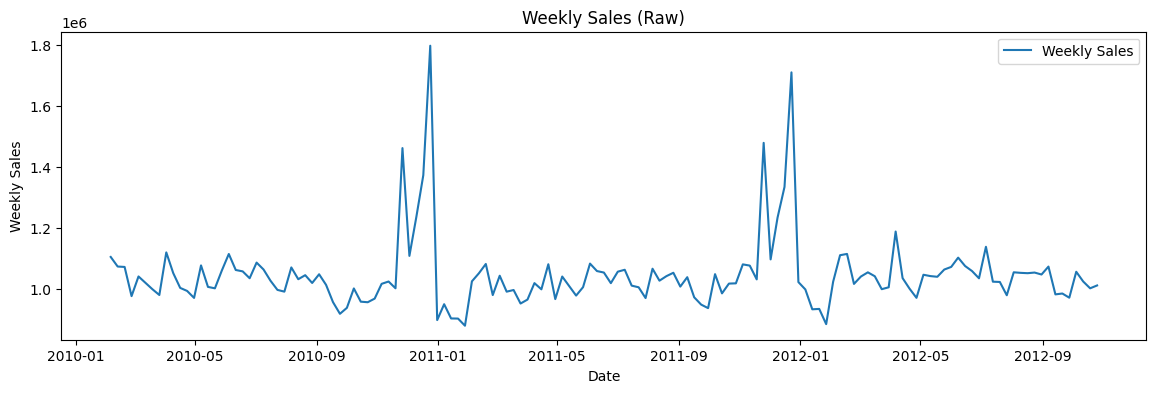

In [33]:
plt.figure(figsize=(14,4))
plt.plot(df_weekly_agg['Date'], df_weekly_agg['Weekly_Sales'], label='Weekly Sales')
plt.title('Weekly Sales (Raw)')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.legend()
plt.show()


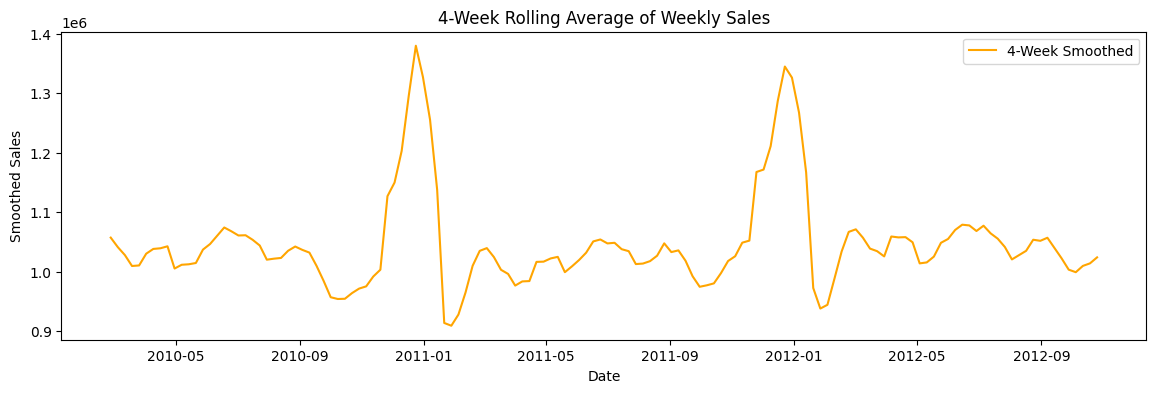

In [34]:
plt.figure(figsize=(14,4))
plt.plot(df_weekly_agg['Date'], df_weekly_agg['Smoothed_4'], color='orange', label='4-Week Smoothed')
plt.title('4-Week Rolling Average of Weekly Sales')
plt.xlabel('Date')
plt.ylabel('Smoothed Sales')
plt.legend()
plt.show()


In [35]:
numeric_cols = ['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']
corr = df[numeric_cols].corr()

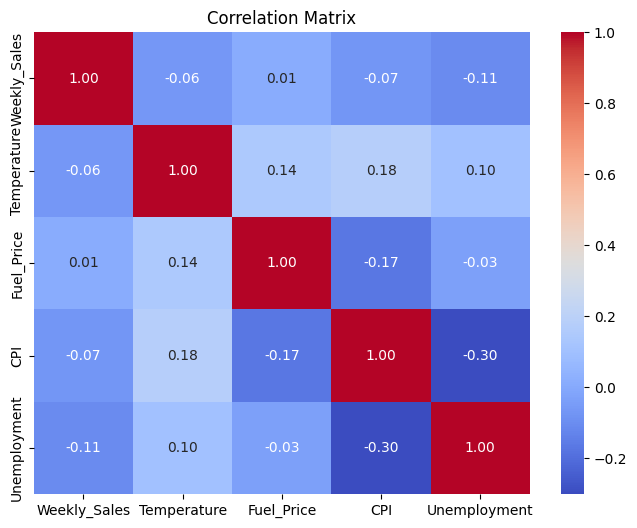

In [36]:
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

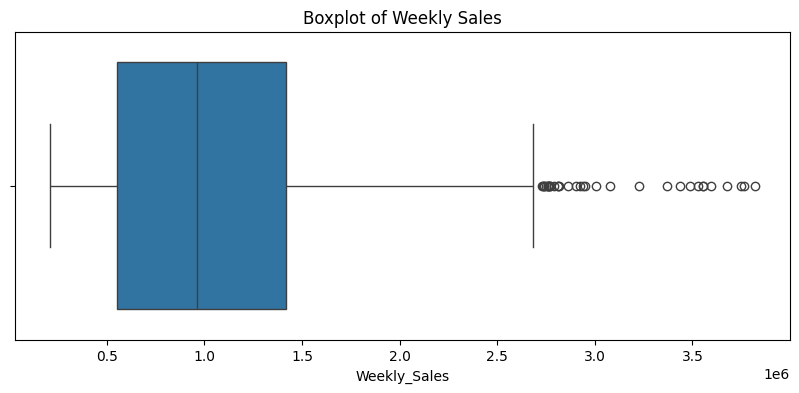

In [37]:
plt.figure(figsize=(10,4))
sns.boxplot(x=df['Weekly_Sales'])
plt.title("Boxplot of Weekly Sales")
plt.show()


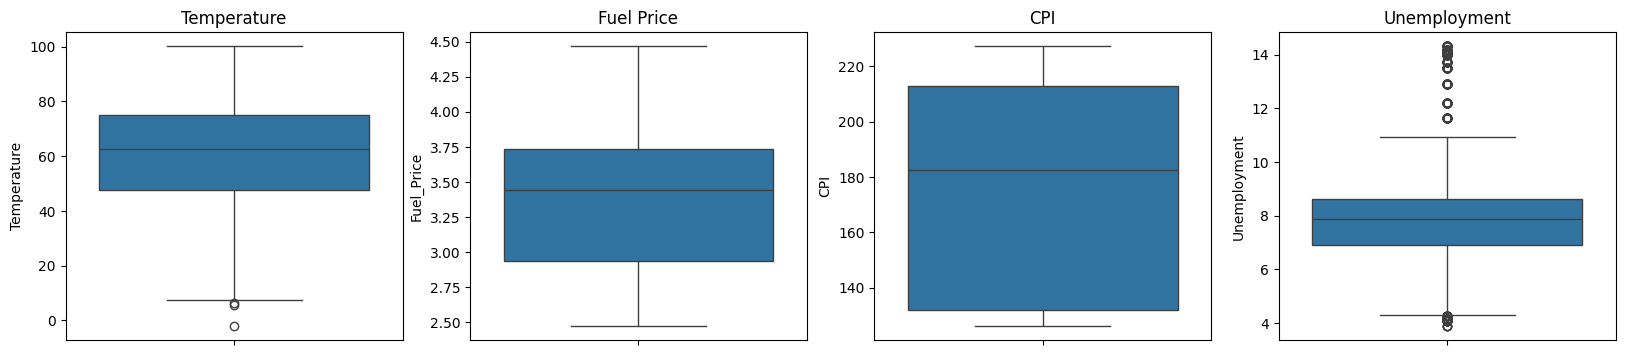

In [38]:
fig, axes = plt.subplots(1, 4, figsize=(20,4))
sns.boxplot(y=df['Temperature'], ax=axes[0])
sns.boxplot(y=df['Fuel_Price'], ax=axes[1])
sns.boxplot(y=df['CPI'], ax=axes[2])
sns.boxplot(y=df['Unemployment'], ax=axes[3])
axes[0].set_title("Temperature")
axes[1].set_title("Fuel Price")
axes[2].set_title("CPI")
axes[3].set_title("Unemployment")
plt.show()


In [39]:
# Feature Selection and Train-Test Split
features = ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment']
X= df[features]
y= df['Weekly_Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15)

In [40]:
# Scaler
Scaler = StandardScaler()
X_train_scaled = Scaler.fit_transform(X_train)
X_test_scaled = Scaler.transform(X_test)

In [41]:
# polynomial features
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

In [42]:
# models
models = {
    'Linear Regression': LinearRegression(),
    'Multiple Polynomial Regression': LinearRegression(),
    'Polynomial Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=0.01),
    'ElasticNet Regression': ElasticNet(alpha=0.01, l1_ratio=0.5)
}

In [43]:
Regs = ['Linear Regression', 'Multiple Polynomial Regression', 'Polynomial Regression', 'Ridge Regression', 'Lasso Regression', 'ElasticNet Regression']

In [44]:
results = {}

In [45]:
# Linear and multiple linear regressions

for name in Regs[0:2]:
    models[name].fit(X_train_scaled, y_train)
    y_pred_lr = models[name].predict(X_test_scaled)
    mse_lr = mean_squared_error(y_test, y_pred_lr)
    r2_lr = r2_score(y_test, y_pred_lr)
    results[name] = {'MSE': mse_lr, 'R2': r2_lr}

In [46]:
# Polynomial regressions (degree=2)

for name in [Regs[2]]:
    models[name].fit(X_train_poly, y_train)
    y_pred_lr = models[name].predict(X_test_poly)
    mse_lr = mean_squared_error(y_test, y_pred_lr)
    r2_lr = r2_score(y_test, y_pred_lr)
    results[name] = {'MSE': mse_lr, 'R2': r2_lr}

In [47]:
# Ridge, Lasso, ElasticNet

for name in Regs[3:6]:
    models[name].fit(X_train_scaled, y_train)
    y_pred_lr = models[name].predict(X_test_scaled)
    mse_lr = mean_squared_error(y_test, y_pred_lr)
    r2_lr = r2_score(y_test, y_pred_lr)
    results[name] = {'MSE': mse_lr, 'R2': r2_lr}

In [48]:
print(results)

{'Linear Regression': {'MSE': 297714872777.9264, 'R2': 0.027915342335056215}, 'Multiple Polynomial Regression': {'MSE': 297714872777.9264, 'R2': 0.027915342335056215}, 'Polynomial Regression': {'MSE': 294665939634.5391, 'R2': 0.03787057602317523}, 'Ridge Regression': {'MSE': 297714797533.2095, 'R2': 0.02791558802058136}, 'Lasso Regression': {'MSE': 297714872272.40045, 'R2': 0.027915343985675856}, 'ElasticNet Regression': {'MSE': 297713379798.11053, 'R2': 0.027920217142819892}}


In [49]:
pd.DataFrame(results).T


,MSE,R2
Linear Regression,2.977149e+11,0.027915
Multiple Polynomial Regression,2.977149e+11,0.027915
Polynomial Regression,2.946659e+11,0.037871
Ridge Regression,2.977148e+11,0.027916
Lasso Regression,2.977149e+11,0.027915
ElasticNet Regression,2.977134e+11,0.027920
